In [14]:
#import packages 
import numpy as np
import pandas as pd
from tensorflow import keras 

In [15]:
#loading weights
#load the saved model 
str = 'SittingChewing_Walking'
json_file = open(str + '.json', 'r')
loaded_model_json = json_file.read()
loaded_model = keras.models.model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights(str + '.h5')



In [19]:
#load daten
X = np.load('TestX_acceleration_4classes.npy')
Y_OHC = np.load('TestY_OHC_acceleration_4classes.npy')
Y =  np.load('TestY_acceleration_4classes.npy')


In [22]:
loaded_model.compile(loss='mean_squared_error',
    optimizer='Adam',
           metrics=['categorical_accuracy'])
loaded_model.evaluate(X,Y_OHC,verbose=1)

291293/291293 [==============================] - 2s 8us/step


[0.09172706887211551, 0.741222755094362]

In [27]:
#plot confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = confusion_matrix(Y,loaded_model.predict_classes(X)) 

In [32]:
cfm

array([[ 39751,    624,  50780,    179],
       [  1663,  20638,   2535,   1414],
       [ 13579,    312, 145835,    301],
       [   732,   1904,   1357,   9689]], dtype=int64)

In [28]:
a = [0 for x in range(4)]
cfm_norm = np.zeros((4,4))#[[0 for x in range(5)] for y in range(5)]

In [29]:
a

[0, 0, 0, 0]

In [33]:
for idx in range(4):
    cfm_norm[idx,:] = cfm[idx,:] / sum(cfm[idx,:]) #len(testY[testY == idx + 1])      

In [34]:
cfm_norm = np.around(cfm_norm,decimals=3)

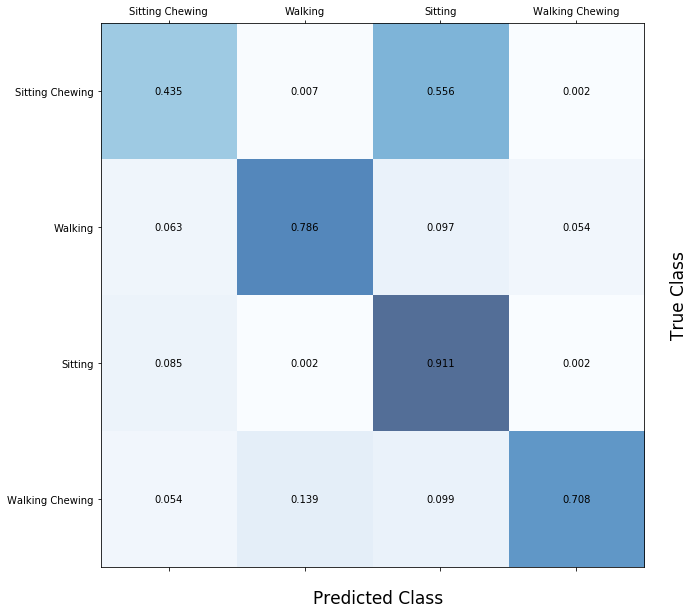

In [43]:
#nicer confusion matrix
fig, ax = plt.subplots(figsize = (10, 10))
ax.matshow(cfm_norm,cmap=plt.cm.Blues,alpha=0.7)

for i in range(cfm_norm.shape[0]):
    for j in range(cfm_norm.shape[1]):
        ax.text(x=j,y=i, s=cfm_norm[i,j],va='center', ha= 'center')

ax.set_xticks([0,1,2,3])
ax.set_yticks([0,1,2,3])
ax.set_xticklabels(['Sitting Chewing','Walking','Sitting','Walking Chewing'])
ax.set_yticklabels(['Sitting Chewing','Walking','Sitting','Walking Chewing'])
ax.yaxis.set_label_coords(1.08,0.5)
ax.xaxis.set_label_coords(0.51,-0.04)
ax.set_xlabel('Predicted Class',fontsize=17)
ax.set_ylabel('True Class',fontsize=17)
plt.show()


In [44]:
fig.savefig('4Class_confusion matrix.png',dpi=100)